In [2]:
from pynq.overlays.base import BaseOverlay 
base = BaseOverlay("base.bit")

In [3]:
%%microblaze base.PMODB
#include "gpio.h"
#include "pyprintf.h"

int reset_all_gpio_pins() {
    // Loop through all 8 GPIO pins on PMOD (0-7)
    for (unsigned int pin = 0; pin < 8; pin++) {
        // Open the GPIO pin
        gpio pin_handle = gpio_open(pin);
        
        // Configure pin as output
        gpio_set_direction(pin_handle, GPIO_OUT);
        
        // Write 0 (LOW) to the pin
        gpio_write(pin_handle, 0);
        
        // Note: No need to close GPIO pins in this implementation
        // The gpio library handles resources automatically
    }
    
    // Return success
    return 0;
}

void set_pin(unsigned int pin, unsigned int state) {
    gpio pin_handle = gpio_open(pin);
    gpio_set_direction(pin_handle, GPIO_OUT);
    gpio_write(pin_handle, state);
}

In [10]:
import time
from pynq.overlays.base import BaseOverlay
from pynq.lib.pmod import Pmod_IO

# Load the base overlay
base = BaseOverlay("base.bit")

# Define PMODB Pins 2-5
led_pins = [2, 3, 4, 5]

# Initialize PMOD GPIO objects
leds = {pin: Pmod_IO(base.PMODB, pin, 'out') for pin in led_pins}

def set_pin(pin, state):
    """
    Sets a PMOD GPIO pin to HIGH (1) or LOW (0).
    
    :param pin: PMOD GPIO pin number
    :param state: 1 for HIGH, 0 for LOW
    """
    if pin in leds:
        leds[pin].write(state)

def pwm_emulate(pin, frequency, duty_cycle, duration=None):
    """
    Emulates PWM on a PMOD GPIO pin.

    :param pin: PMOD GPIO pin number
    :param frequency: Frequency in Hz
    :param duty_cycle: Duty cycle percentage (0-100)
    :param duration: Duration in seconds (None for infinite)
    """
    if pin not in leds:
        print(f"Pin {pin} is not configured as a GPIO output.")
        return
    
    if duty_cycle <= 0:
        set_pin(pin, 0)  # Always OFF
        return
    elif duty_cycle >= 100:
        set_pin(pin, 1)  # Always ON
        return

    period = 1.0 / frequency  # Total period of PWM in seconds
    on_time = (duty_cycle / 100.0) * period
    off_time = period - on_time

    start_time = time.time()
    
    while duration is None or (time.time() - start_time < duration):
        set_pin(pin, 1)  # Turn ON
        time.sleep(on_time)
        set_pin(pin, 0)  # Turn OFF
        time.sleep(off_time)

# PWM on PMODB pins 2-5
# for pin in led_pins:
#    pwm_emulate(pin, 1000, 50, 10)  # 1kHz, 50% duty cycle, 10 sec

# Test different PWM frequencies to find the optimal one
test_frequencies = [50, 100, 200, 500, 1000, 2000, 5000, 10000]  # Hz

for freq in test_frequencies:
    print(f"Testing PWM Frequency: {freq} Hz")
    pwm_emulate(2, freq, 50, 3)  # Test on PIN2, 50% duty cycle, for 3 sec


Testing PWM Frequency: 50 Hz
Testing PWM Frequency: 100 Hz
Testing PWM Frequency: 200 Hz
Testing PWM Frequency: 500 Hz
Testing PWM Frequency: 1000 Hz
Testing PWM Frequency: 2000 Hz
Testing PWM Frequency: 5000 Hz
Testing PWM Frequency: 10000 Hz


In [12]:
import time
from pynq.overlays.base import BaseOverlay
from pynq.lib.pmod import Pmod_IO

# Load the base overlay
base = BaseOverlay("base.bit")

# Define PMODB Pins (Ensure to use only the GREEN LED control pin)
green_led_pin = 2  

# Initialize PMOD GPIO for Green LED
green_led = Pmod_IO(base.PMODB, green_led_pin, 'out')

def set_pin(pin, state):
    """Set a GPIO pin HIGH (1) or LOW (0)."""
    green_led.write(state)

def pwm_emulate(pin, frequency, duty_cycle, duration):
    """Emulates PWM on a single PMOD GPIO pin for LED brightness control."""
    if duty_cycle <= 0:
        set_pin(pin, 0)  # Always OFF
        return
    elif duty_cycle >= 100:
        set_pin(pin, 1)  # Always ON
        return

    period = 1.0 / frequency
    on_time = (duty_cycle / 100.0) * period
    off_time = period - on_time

    start_time = time.time()
    
    while time.time() - start_time < duration:
        set_pin(pin, 1)  # Turn ON
        time.sleep(on_time)
        set_pin(pin, 0)  # Turn OFF
        time.sleep(off_time)

# **Test 100%, 75%, 50%, and 25% brightness**
brightness_levels = [100, 75, 50, 25]  # Duty cycle values
test_duration = 5  # 5 seconds per brightness level
pwm_frequency = 1000  # 1kHz to avoid flicker

for brightness in brightness_levels:
    print(f"Setting LED to {brightness}% brightness")
    pwm_emulate(green_led_pin, pwm_frequency, brightness, test_duration)


Setting LED to 100% brightness
Setting LED to 75% brightness
Setting LED to 50% brightness
Setting LED to 25% brightness


Testing duty cycle: 0%
Testing duty cycle: 10%
Testing duty cycle: 20%
Testing duty cycle: 30%
Testing duty cycle: 40%
Testing duty cycle: 50%
Testing duty cycle: 60%
Testing duty cycle: 70%
Testing duty cycle: 80%
Testing duty cycle: 90%
Testing duty cycle: 100%


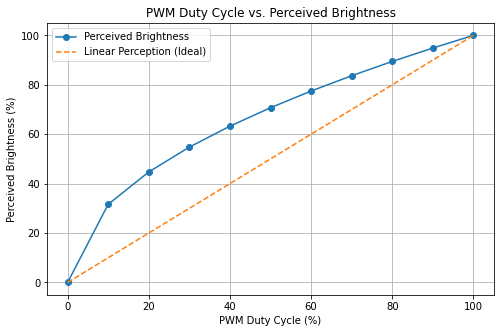

In [13]:
import time
import numpy as np
import matplotlib.pyplot as plt
from pynq.overlays.base import BaseOverlay
from pynq.lib.pmod import Pmod_IO

# Load the base overlay
base = BaseOverlay("base.bit")

# Define the GREEN LED pin 
green_led_pin = 2

# Initialize PMOD GPIO for Green LED
green_led = Pmod_IO(base.PMODB, green_led_pin, 'out')

def set_pin(pin, state):
    """Set a GPIO pin HIGH (1) or LOW (0)."""
    green_led.write(state)

def pwm_emulate(pin, frequency, duty_cycle, duration):
    """Emulates PWM on a PMOD GPIO pin for LED brightness control."""
    if duty_cycle <= 0:
        set_pin(pin, 0)  # Always OFF
        return
    elif duty_cycle >= 100:
        set_pin(pin, 1)  # Always ON
        return

    period = 1.0 / frequency
    on_time = (duty_cycle / 100.0) * period
    off_time = period - on_time

    start_time = time.time()
    
    while time.time() - start_time < duration:
        set_pin(pin, 1)  # Turn ON
        time.sleep(on_time)
        set_pin(pin, 0)  # Turn OFF
        time.sleep(off_time)

# **Step 1: Measure Brightness for Different Duty Cycles**
duty_cycles = np.arange(0, 110, 10)  # 0% to 100% in steps of 10%
perceived_brightness = []

pwm_frequency = 1000  # Keep frequency high to avoid flickering
test_duration = 1  # 1 second per test

for duty in duty_cycles:
    print(f"Testing duty cycle: {duty}%")
    pwm_emulate(green_led_pin, pwm_frequency, duty, test_duration)

    # **Step 2: Estimate Perceived Brightness using Stevens' Power Law**
    gamma = 0.5  # Approximate exponent for light perception
    brightness = (duty / 100) ** gamma  # Normalize to [0,1]
    perceived_brightness.append(brightness * 100)  # Scale to [0,100]%

# **Step 3: Plot Duty Cycle vs. Perceived Brightness**
plt.figure(figsize=(8, 5))
plt.plot(duty_cycles, perceived_brightness, 'o-', label="Perceived Brightness")
plt.plot(duty_cycles, duty_cycles, '--', label="Linear Perception (Ideal)")
plt.xlabel("PWM Duty Cycle (%)")
plt.ylabel("Perceived Brightness (%)")
plt.title("PWM Duty Cycle vs. Perceived Brightness")
plt.legend()
plt.grid()
plt.show()

In [36]:
import time
import asyncio
from pynq.overlays.base import BaseOverlay
from pynq.lib.pmod import Pmod_IO

# Load the base overlay
base = BaseOverlay("base.bit")

# **LED Pin Mapping**
RED_PIN = 3
GREEN_PIN = 2
BLUE_PIN = 1

# Initialize PMOD GPIO objects
red_led = Pmod_IO(base.PMODB, RED_PIN, 'out')
green_led = Pmod_IO(base.PMODB, GREEN_PIN, 'out')
blue_led = Pmod_IO(base.PMODB, BLUE_PIN, 'out')

# Use `base.buttons` for onboard buttons
buttons_gpio = base.buttons  

# Global state variables
current_color = "red"
blinking = True

async def blink_led():
    """Continuously blinks the LED corresponding to the selected color."""
    global blinking
    while True:
        if blinking:
            if current_color == "red":
                red_led.write(1)
                await asyncio.sleep(1)
                red_led.write(0)
            elif current_color == "green":
                green_led.write(1)
                await asyncio.sleep(1)
                green_led.write(0)
            elif current_color == "blue":
                blue_led.write(1)
                await asyncio.sleep(1)
                blue_led.write(0)
        await asyncio.sleep(1)  # Consistent cycle time

async def check_buttons():
    """Monitor buttons and change LED blinking color accordingly."""
    global blinking, current_color
    while True:
        button_states = buttons_gpio.read()
        print(f"Button state: {button_states:04b}")  # Debugging output

        if button_states & 0b0001:  # BTN0 -> Blink Red
            print("BTN0 Pressed: Blinking Red")
            current_color = "red"
            blinking = True
        elif button_states & 0b0010:  # BTN1 -> Blink Green
            print("BTN1 Pressed: Blinking Green")
            current_color = "green"
            blinking = True
        elif button_states & 0b0100:  # BTN2 -> Blink Blue
            print("BTN2 Pressed: Blinking Blue")
            current_color = "blue"
            blinking = True
        elif button_states & 0b1000:  # BTN3 -> Stop blinking
            print("BTN3 Pressed: Stop Blinking")
            blinking = False
            red_led.write(0)
            green_led.write(0)
            blue_led.write(0)

        await asyncio.sleep(0.1)  # Debounce delay

async def main():
    """Main async function to run tasks concurrently."""
    blink_task = asyncio.create_task(blink_led())
    button_task = asyncio.create_task(check_buttons())

    await asyncio.gather(blink_task, button_task)

# **Ensure red LED blinks initially**
asyncio.run(main())

Button state: 0000
Button state: 0000
Button state: 0000
Button state: 0000
Button state: 0000
Button state: 0000
Button state: 0000
Button state: 0000
Button state: 0000
Button state: 0000
Button state: 0000
Button state: 0000
Button state: 0000
Button state: 0000
Button state: 0000
Button state: 0000
Button state: 0000
Button state: 0000
Button state: 0000
Button state: 0000
Button state: 0000
Button state: 0000
Button state: 0000
Button state: 0000
Button state: 0000
Button state: 0000
Button state: 0000
Button state: 0000
Button state: 0000
Button state: 0000
Button state: 0000
Button state: 0000
Button state: 0000
Button state: 0000
Button state: 0000
Button state: 0000
Button state: 0000
Button state: 0000
Button state: 0000
Button state: 0000
Button state: 0000
Button state: 0000
Button state: 0000
Button state: 0000
Button state: 0000
Button state: 0000
Button state: 0000
Button state: 0000
Button state: 0000
Button state: 0000
Button state: 0000
Button state: 0000
Button state

KeyboardInterrupt: 